In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [17]:
data_file_path = '/Users/melissafasol/Projects/zindi-inkuba-notebook/data/'

# Model folder names
sentiment_og_ls = ['hau_se_og_model', 'swa_se_og_model']
sentiment_qlora_ls = ['hau_se_qlora_model', 'swa_se_qlora_model']
titles = ['Hausa - Base', 'Swahili - Base', 'Hausa - QLoRA', 'Swahili - QLoRA']


/var/folders/c8/b70xcn351z9fpn0fw0h0253r0000gn/T/ipykernel_64289/50430923.py:40: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/melissafasol/micromamba/envs/inkuba-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


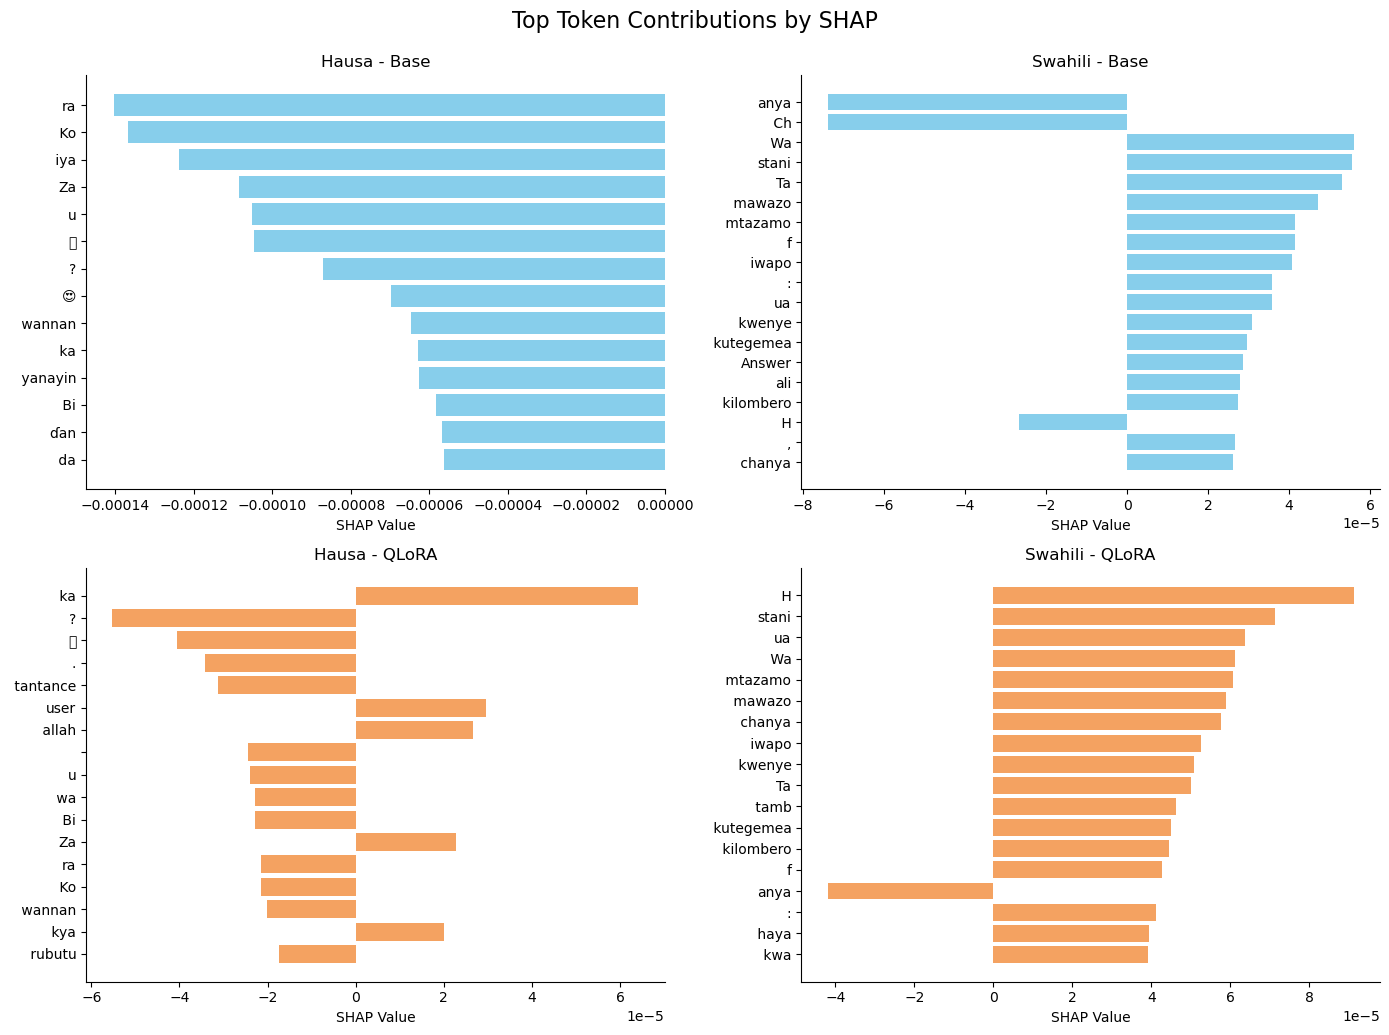

In [19]:
# Plot colors
base_color = 'skyblue'
qlora_color = '#f4a261'  # soft light orange

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, (model_list, row) in enumerate(zip([sentiment_og_ls, sentiment_qlora_ls], [0, 1])):
    for j, model_name in enumerate(model_list):
        full_path = os.path.join(data_file_path, model_name)
        shap_values_path = os.path.join(full_path, "shap_values.pkl")

        try:
            with open(shap_values_path, "rb") as f:
                loaded_shap_values = pickle.load(f)
        except Exception as e:
            print(f"❌ Error loading SHAP values for {model_name}:", e)
            continue

        example = loaded_shap_values[0]
        tokens = example.data
        shap_vals = example.values

        if isinstance(shap_vals[0], (list, np.ndarray)):
            shap_vals = [v[0] for v in shap_vals]

        df = pd.DataFrame({"token": tokens, "shap_value": shap_vals})
        df = df.reindex(df["shap_value"].abs().sort_values(ascending=False).index)

        ax = axs[row][j]
        color = base_color if row == 0 else qlora_color
        ax.barh(df["token"][:20], df["shap_value"][:20], color=color)
        ax.invert_yaxis()
        ax.set_title(titles[row * 2 + j])
        ax.set_xlabel("SHAP Value")

        # Hide top and right spines only
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.suptitle("Top Token Contributions by SHAP", fontsize=16, y=1.03)
plt.show()

